## Question 1:
You are given the following dataset:

In [16]:
import pandas as pd

# Dataset
data = {
    "Input_Feature_1": [2, 1, 3, 4, 5],
    "Input_Feature_2": [1, 3, 2, 5, 4],
    "Input_Feature_3": [3, 2, 1, 6, 6],
    "Target": ['No', 'Yes', 'No', 'Yes', 'Yes']
}

# Create a DataFrame
df = pd.DataFrame(data)

df

,Input_Feature_1,Input_Feature_2,Input_Feature_3,Target
0,2,1,3,No
1,1,3,2,Yes
2,3,2,1,No
3,4,5,6,Yes
4,5,4,6,Yes


``Write a Python code to:``

- Train a Logistic Regression classifier on this dataset.
- Generate the accuracy score of the model.
- Plot the confusion matrix as a heatmap.

### Explanation for the confusion matrix:

A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is a means of displaying the number of accurate and inaccurate instances based on the model’s predictions. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance.

The matrix displays the number of instances produced by the model on the test data.

- True Positive (TP): The model correctly predicted a positive outcome (the actual outcome was positive).
- True Negative (TN): The model correctly predicted a negative outcome (the actual outcome was negative).
- False Positive (FP): The model incorrectly predicted a positive outcome (the actual outcome was negative). Also known as a Type I error.
- False Negative (FN): The model incorrectly predicted a negative outcome (the actual outcome was positive). Also known as a Type II error.


<img src="https://i.imgur.com/UM28BCN.png" width="480">

## Solution for question 1:

In [17]:
# Importing the required dependencies:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Mapping the categorical data in the target column into numerics: 0 and 1
df['Target'] = df['Target'].map({'No': 0, 'Yes': 1})

# Display our modified df:
df

,Input_Feature_1,Input_Feature_2,Input_Feature_3,Target
0,2,1,3,0
1,1,3,2,1
2,3,2,1,0
3,4,5,6,1
4,5,4,6,1


Accuracy Score: 0.50


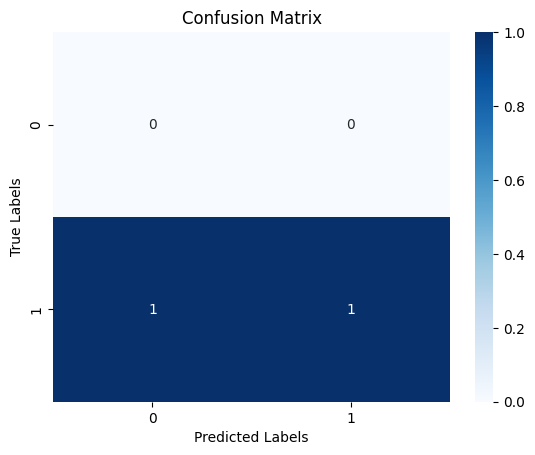

In [25]:
# Defining the INput columns and target column for the model:
X = df[['Input_Feature_1', 'Input_Feature_2', 'Input_Feature_3']]
y = df['Target']

# Splitting the DF into two splits:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Logistic Regression Model:
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set:
y_pred = model.predict(X_test)

# Calculating the model's accuracy score:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Generating confusion matrix:
conf_matrix = confusion_matrix(y_test, y_pred)

# Let's generate the confusion matrix in the form of HEATMAP:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Question 2:

You are given the following dataset:

In [28]:
import pandas as pd

# Create the dataset

data = {
    "Age": [25, 30, 45, 35, None, 28, 50, 40, 33, 27, 42, None, 31, 37, 29],
    "Salary": [50000, None, 120000, 75000, 80000, 60000, 150000, 95000, 85000, None, 110000, 105000, 70000, 92000, None],
    "Gender": ["Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male"],
    "Department": ["Sales", "IT", "HR", "IT", "Sales", "HR", "IT", "Sales", "HR", "Sales", "IT", "HR", "Sales", "IT", "HR"],
    "Experience": [2, 5, 20, 10, 12, 4, 25, 15, 9, 3, 18, 17, 8, 11, 6],
    "Target": [20000, 40000, 90000, 60000, 70000, 35000, 120000, 80000, 70000, 30000, 100000, 95000, 55000, 78000, 45000]
}

df = pd.DataFrame(data)

df

,Age,Salary,Gender,Department,Experience,Target
0,25.0,50000.0,Male,Sales,2,20000
1,30.0,NaN,Female,IT,5,40000
2,45.0,120000.0,Female,HR,20,90000
3,35.0,75000.0,Male,IT,10,60000
4,NaN,80000.0,Female,Sales,12,70000
5,28.0,60000.0,Male,HR,4,35000
6,50.0,150000.0,Female,IT,25,120000
7,40.0,95000.0,Male,Sales,15,80000
8,33.0,85000.0,Female,HR,9,70000
9,27.0,NaN,Male,Sales,3,30000


`Write a Python code to Perform the following:`

1. Handle the NaN values in the dataset.
2. Encode the categorical columns Gender and Department.
3. Apply Min-Max scaling to the numerical columns.
4. Train a multiple linear regression model to predict the Target column.
5. Evaluate the model using the Root Mean Squared Error (`RMSE`).

## Solution for question 2:

In [26]:
# Importing the required dependencies:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np

In [29]:
# Step1: Handling all NaN values in AGE and SALARY columns:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

# Display our modified df:
df

<ipython-input-29-6b894d7136b7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-29-6b894d7136b7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,Age,Salary,Gender,Department,Experience,Target
0,25.000000,50000.0,Male,Sales,2,20000
1,30.000000,91000.0,Female,IT,5,40000
2,45.000000,120000.0,Female,HR,20,90000
3,35.000000,75000.0,Male,IT,10,60000
4,34.769231,80000.0,Female,Sales,12,70000
5,28.000000,60000.0,Male,HR,4,35000
6,50.000000,150000.0,Female,IT,25,120000
7,40.000000,95000.0,Male,Sales,15,80000
8,33.000000,85000.0,Female,HR,9,70000
9,27.000000,91000.0,Male,Sales,3,30000


In [30]:
# Step2: Encoding Gender and Department columns into numerics:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Department'] = label_encoder.fit_transform(df['Department'])

# Display our modified df:
df

,Age,Salary,Gender,Department,Experience,Target
0,25.000000,50000.0,1,2,2,20000
1,30.000000,91000.0,0,1,5,40000
2,45.000000,120000.0,0,0,20,90000
3,35.000000,75000.0,1,1,10,60000
4,34.769231,80000.0,0,2,12,70000
5,28.000000,60000.0,1,0,4,35000
6,50.000000,150000.0,0,1,25,120000
7,40.000000,95000.0,1,2,15,80000
8,33.000000,85000.0,0,0,9,70000
9,27.000000,91000.0,1,2,3,30000


In [31]:
# Step3: Normalizing Age and Salary columns using Min-MAx scaler trick:

scaler = MinMaxScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])

# Display our modified df:
df

,Age,Salary,Gender,Department,Experience,Target
0,0.000000,0.00,1,2,2,20000
1,0.200000,0.41,0,1,5,40000
2,0.800000,0.70,0,0,20,90000
3,0.400000,0.25,1,1,10,60000
4,0.390769,0.30,0,2,12,70000
5,0.120000,0.10,1,0,4,35000
6,1.000000,1.00,0,1,25,120000
7,0.600000,0.45,1,2,15,80000
8,0.320000,0.35,0,0,9,70000
9,0.080000,0.41,1,2,3,30000


In [32]:
# Training our MULTIPLE LINEAR REGRESSION MODEL:
X = df[['Age', 'Salary', 'Gender', 'Department', 'Experience']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Testing the model:
y_pred = model.predict(X_test)

# Calculating the RMSE:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 8820.93


## Question 3:

Write a Python code to calculate the cosine similarity between the following two sentences:

- Sentence 1: "I love programming in Python."
- Sentence 2: "Python programming is fun."

## Solution for question 3:

In [10]:
# Importing the required dependencies:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sentences:
sentences = ['I love programming in Python.', 'Chemistry and Biology are two fundamental subjects in Medicine.']

# Converting two sentences to TF-IDF Matrix:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)

# Calculating the similarity between two sentences using cosine similarity rule:
similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])

print(similarity)

[[0.0926979]]


## Question 4:

Write Python code to classify the following sentences as positive or negative using the Logistic Regression algorithm:

1. `The app is user-friendly.`
2. `The interface is confusing.`

Training data:

In [11]:
# Training data:
texts = ["Good experience!", "Terrible design.", "Loved the functionality.", "Horrible app."]
labels = [1, 0, 1, 0]  # 1 = positive, 0 = negative


## Solution for question 4:

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Convert our sentences in the training data set into numerics:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(texts)


# Training the Logistic Regression model:
model = LogisticRegression()
model.fit(X_train, labels)

# Testing the model:
test_sentences = ["The app is not fascinating.", "The user interface is stunning."]
X_test = vectorizer.transform(test_sentences)

predictions = model.predict(X_test)

for sentence, label in zip(test_sentences, predictions):
    print(f"{sentence}: {'Positive' if label == 1 else 'Negative'}")

The app is not fascinating.: Negative
The user interface is stunning.: Positive


## Question 5:

Write Python code to:

- Convert the text: `I like Machine Learning; it is a little bit challenging! But, it is still a lot of fun!` to lowercase.
- Tokenize the text into words.
- Count the frequency of each word (`IGNORE PUNCTUATIONS WHEN COUNTING WORDS`).

## Solution for question 5: